In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../data/raw/heart.csv')

## Description
Please, refer to README.md for problem description


Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## EDA

In [3]:
print(f"Dataset size: {data.shape[0]} rows")
print(f"Columns: {data.columns.values}")

Dataset size: 918 rows
Columns: ['Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope' 'HeartDisease']


In [4]:
print(f"NaN information: \n{data.isna().sum()}")

NaN information: 
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [5]:
print("Description of features with number types")
data.describe(include='number')

Description of features with number types


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
print("Description of not number types. \nhint: FastingBS is categorical but it is taken as \"numerical\" by default read_csv function")
data.describe(exclude='number')

Description of not number types. 
hint: FastingBS is categorical but it is taken as "numerical" by default read_csv function


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [7]:
print(f"value counts of target feature:\n{data.HeartDisease.value_counts(normalize=True)}")

value counts of target feature:
1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64


In [8]:
# set columns as constants
NUMERICAL_COLUMNS = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
CATEGORICAL_COLUMNS = ["FastingBS", 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
TARGET_COLUMN = 'HeartDisease'

### EDA: Numerical Features

#### Summary
- I found that RestingBP, Cholesterol and OldPeak have outliers
  - RestingBP, Cholesterol have zero values, perhaps NaN or missing values.
- by boxes and violin grouped by target:
  - cholesterol, maxHR and old peak would be good features. (because we could separate directly with an if, so it will be easy detect that pattern or rule with a model)


In [9]:
data_numerical = data[NUMERICAL_COLUMNS]

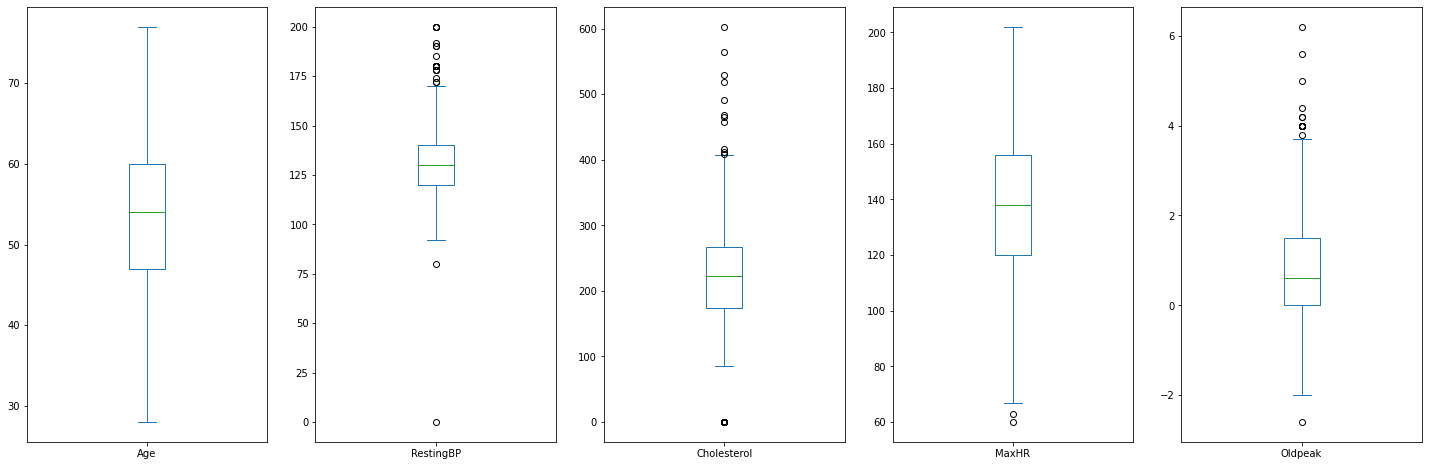

In [10]:
# plot a box plot of all numerical features (not HeartDisease because it is categorical)
_ = data_numerical.loc[:, ~data_numerical.columns.isin(['HeartDisease'])].plot.box(subplots=True, sharey=False, figsize=(25,8))

In [11]:
# strange values...
data.loc[data["Cholesterol"] <= 0]
# perhaps missing values, correct before use or impute with the mean by heart-disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [12]:
data.loc[data["RestingBP"] <= 0]
# if the person is dead, it will be ok... this value will be corrected or imputed.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [13]:
data.loc[data["Oldpeak"] <= 0]
# I think that this value is ok, but I don't know.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


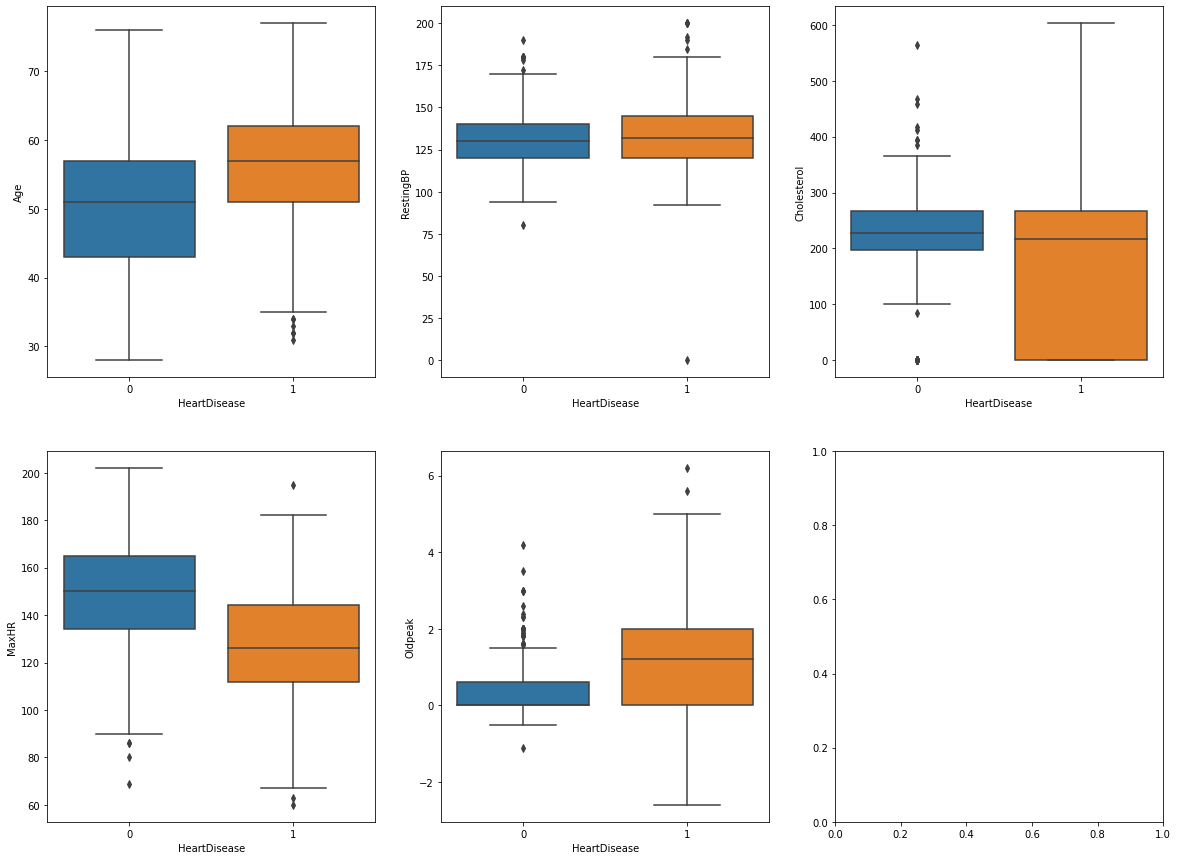

In [14]:
# distribution of numerical features group by HeartDisease
fig, axes = plt.subplots(2,3, sharex=False, sharey=False, figsize=(20,15))

for c, ax in zip (NUMERICAL_COLUMNS, np.concatenate(axes)[:-1]):
    sns.boxplot(y=c, x='HeartDisease', data=data, ax=ax)

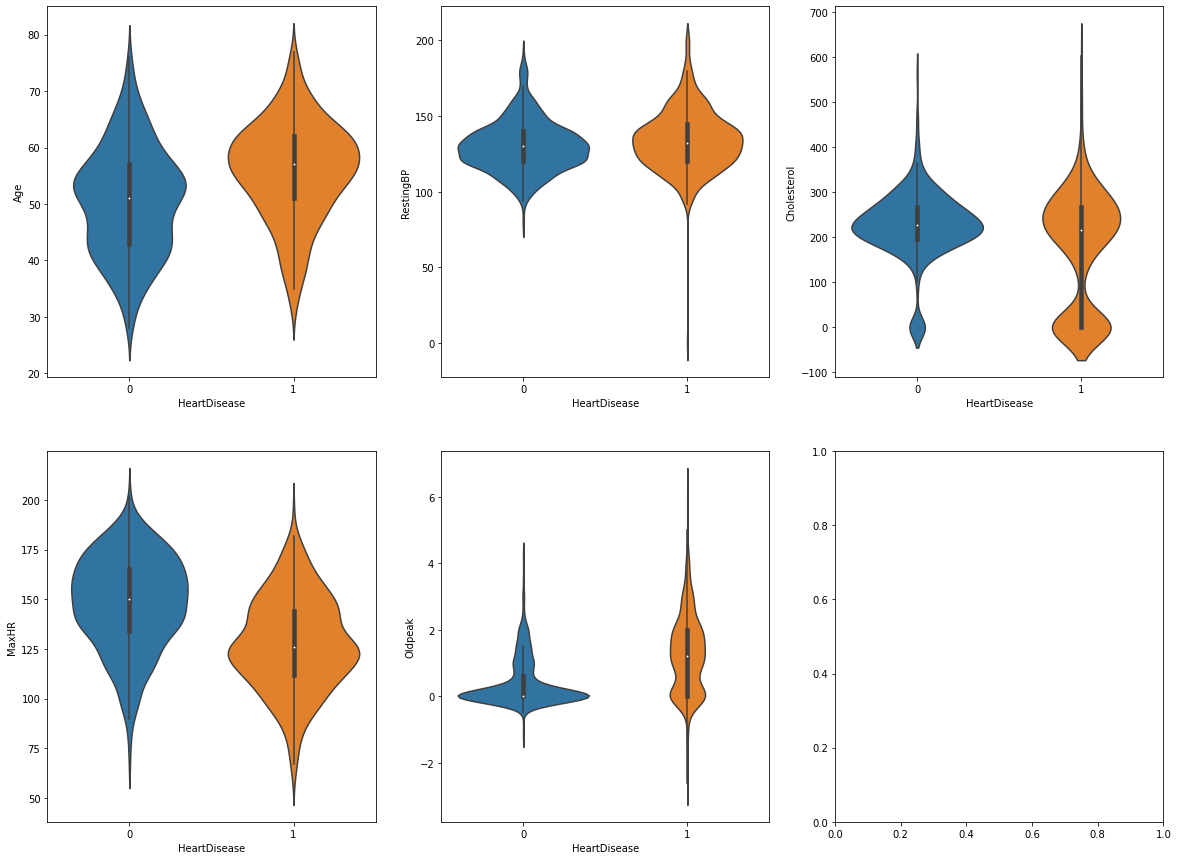

In [15]:
# distribution and frequencies of numerical features group by HeartDisease
fig, axes = plt.subplots(2,3, sharex=False, sharey=False, figsize=(20,15))

for c, ax in zip (NUMERICAL_COLUMNS, np.concatenate(axes)[:-1]):
    sns.violinplot(y=c, x='HeartDisease', data=data, ax=ax)


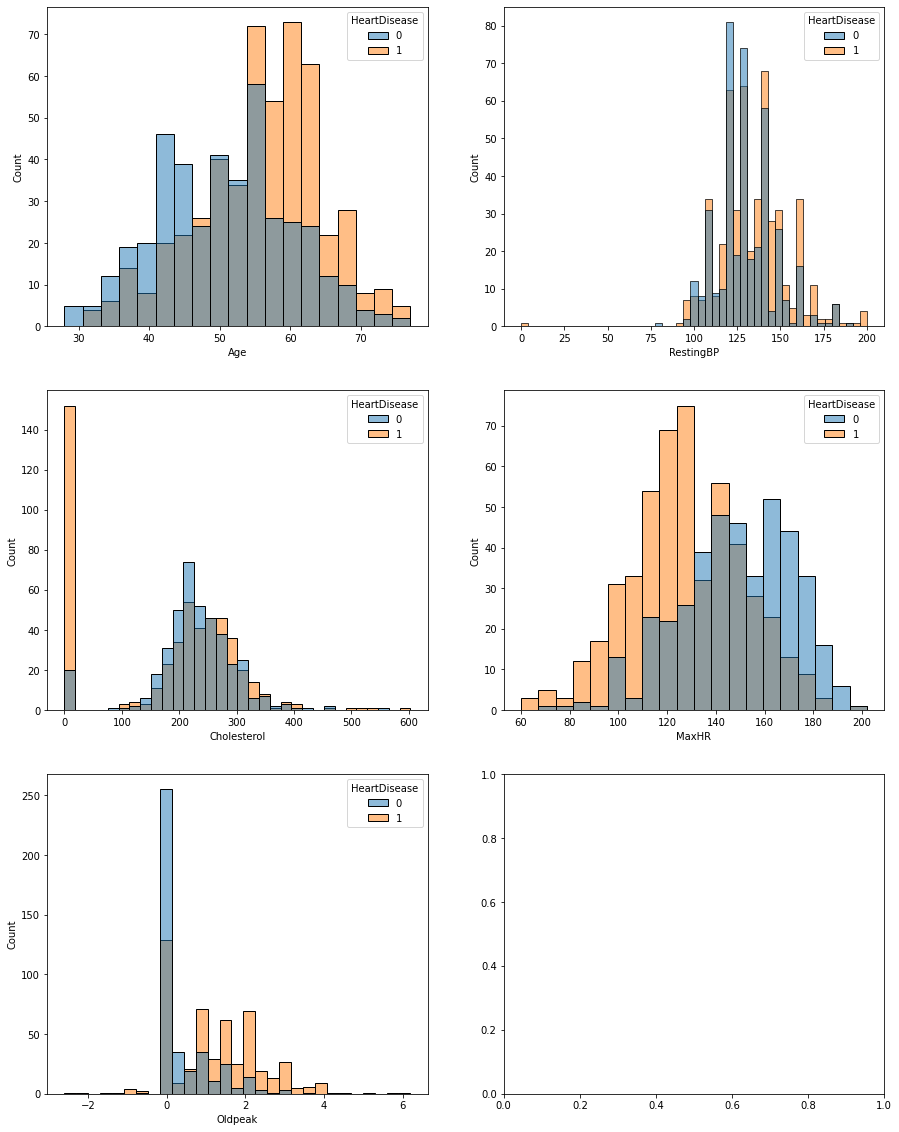

In [16]:
# frequencies of numerical features group by HeartDisease
fig, axes = plt.subplots(3,2, sharex=False, sharey=False, figsize=(15,20))

for c, ax in zip (NUMERICAL_COLUMNS, np.concatenate(axes)[:-1]):
    sns.histplot(x=c, hue='HeartDisease', data=data, ax=ax)


### EDA: Categorical Features

- fastingBS (or sugar in blood) when is high, it could affect the heart.
- the dataset has more Male than Female, so is biased.
- ChestPaineType=ASY is very common when heart disease is positive
  - ASY means asymtomatic, so sadly because is an ordinary human thinking that if you suffer any chest pain, you have a heart attack. 
  - in addition, some heart diseases are called "silent disease".
- usually, ExerciseAngina positive could mean a heart disease.
- ST_Slope=flat could mean a heart disease.


Above analysis is from data, data could be biased or wrong. I am not a doctor or specialist to expose how correct or not are these results.

So, I suppose that doctors would evaluate the results of this features and offer more analysis to the patient. 

In summary, Data talks but I don't have tools now to "claim a truth". (I said it! DataTalks :))


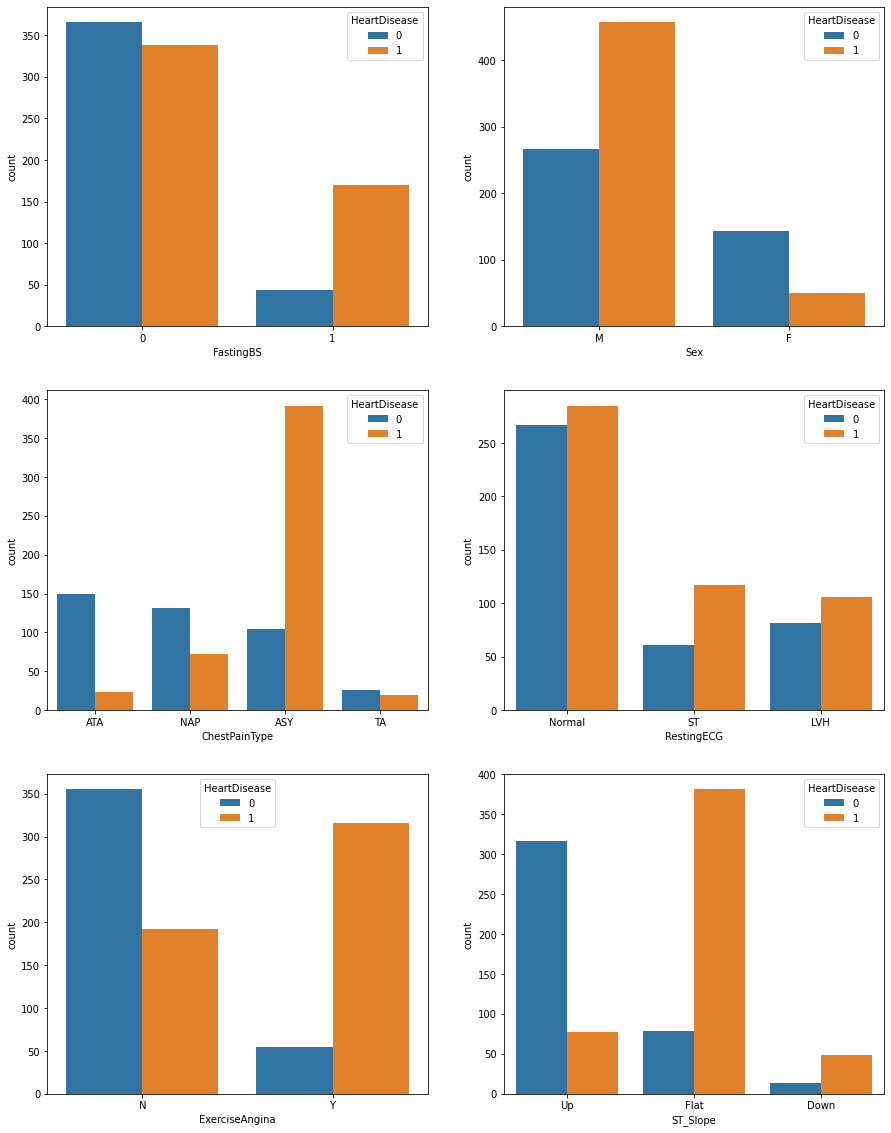

In [17]:
# frequencies of numerical features group by HeartDisease
fig, axes = plt.subplots(3,2, sharex=False, sharey=False, figsize=(15,20))

for c, ax in zip (CATEGORICAL_COLUMNS, np.concatenate(axes)):
    sns.countplot(x=c, hue='HeartDisease', data=data, ax=ax)

### Feature importance (Categorical)

In [18]:
from sklearn.metrics import mutual_info_score

By this analysis, the most important features are ST_Slope, ChestPainType and ExerciseAngina

<AxesSubplot:>

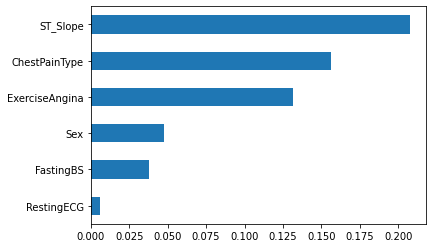

In [19]:
from functools import partial
mutual_info_heart_disease = partial(mutual_info_score, data[TARGET_COLUMN])
data[CATEGORICAL_COLUMNS].apply(mutual_info_heart_disease).sort_values().plot.barh()

In [20]:
# TODO: show feature importances of numerical values, this approach is working, but I don't know if it is the best one.
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier()
# model.fit(data[NUMERICAL_COLUMNS], data[TARGET_COLUMN])
# pd.Series(model.feature_importances_, index=NUMERICAL_COLUMNS).plot.barh()

### Correlation (numerical)
Any columns is correlated linearly to the target column, so we should not drop by this criteria.
If the correlation is greater than 0.8 or lesser than -0.8, we may drop the columns, because they are linearly dependant.

In [21]:
# correlation of numerical values to target (how correlated are)
data[NUMERICAL_COLUMNS].corrwith(data[TARGET_COLUMN])

Age            0.282039
RestingBP      0.107589
Cholesterol   -0.232741
MaxHR         -0.400421
Oldpeak        0.403951
dtype: float64